Importing Required Libraries

In [4]:
# Import required Libaries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_iris
data = load_iris()

Importing the dataset from sklearn

In [8]:
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['result'] = data.target
df.shape

(150, 5)

Checkin the dataset

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


DEPENDENT AND INDEPENDENT FEATURES

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
print(f"X_shape : {X.shape}, y_shape : {y.shape}")

X_shape : (150, 4), y_shape : (150,)


LOADING THE DESCISION TREE MODULE

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

HERE IMA USE CROSS_VAL_SCORE

In [19]:
# We will just over-fit the data and later we can do pruning 
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model,X,y,scoring='accuracy',cv=10)
print(np.mean(cvs))

0.96


Training a model

In [20]:
model.fit(X,y)

DecisionTreeClassifier()

To plot a tree we need a sklearn library called as tree

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

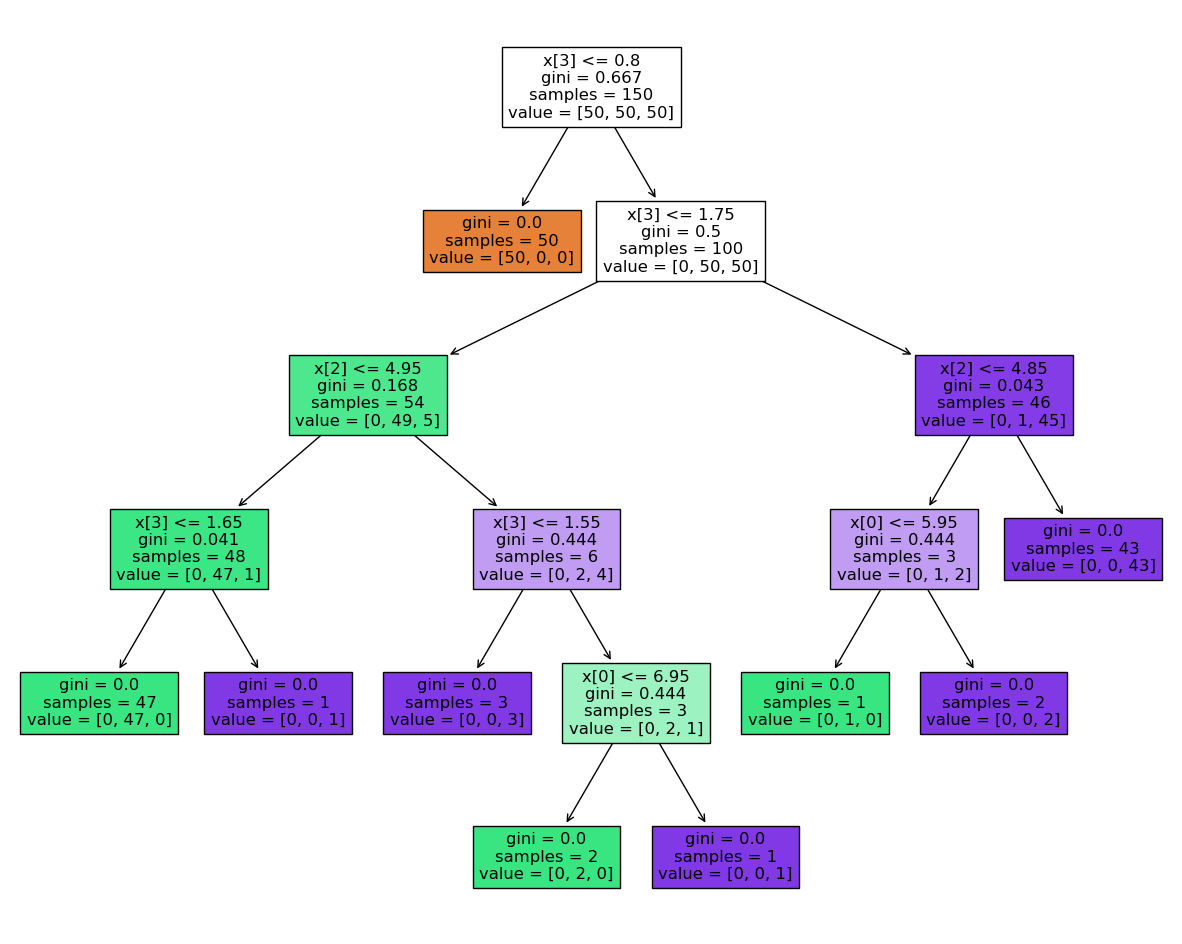

In [33]:
from sklearn import tree
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,12)
tree.plot_tree(model.fit(X,y), filled=True)

^^^^^^^^^^^^^ ABOVE IN THE OBSERVATION WE CAN SEE THAT AFTER THE THIRD LEVEL WE DONT NEED A SPLIT : POST PRUNING

and one more OBSERVATIONN THE ROOT NODE GINI INDEX VALUE IS MORE THAN 0.5 WHICH SHOULD NOT HAPPEND CAUSE GINNI VALUES MUST BE BTW 0 - 0.5

ANS : Gini can't be greater than 0.5 but that is in case of binary classification only. Over here we can clearly see in that node, there are 3 output classes with each having frequency 50, so if we calculate Gini index we'll get 1 - (1/9+1/9+1/9) that is clearly 0.667. So its right over there.
So basically the generalized formula of maximum gini impurity value of a classification problem is 1/n, where n is the number of classes in the output feature. Hope this helps

In [35]:
# https://www.geeksforgeeks.org/pruning-decision-trees/